In [32]:
import nltk

In [33]:
# nltk.download_shell() - done

In [34]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [35]:
len(messages)

5574

In [36]:
messages[45]

'ham\tNo calls..messages..missed calls'

In [37]:
for mess_no, message in enumerate(messages[:10]):
  print(mess_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [38]:
import pandas as pd

In [39]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [41]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [42]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

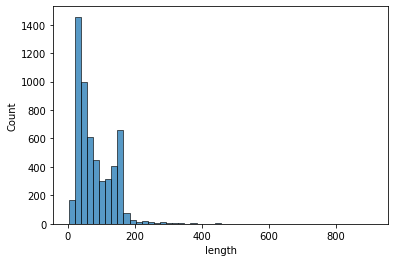

In [44]:
sns.histplot(data=messages, x='length', bins=50)

In [45]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [46]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12f83778d0>,
      dtype=object)

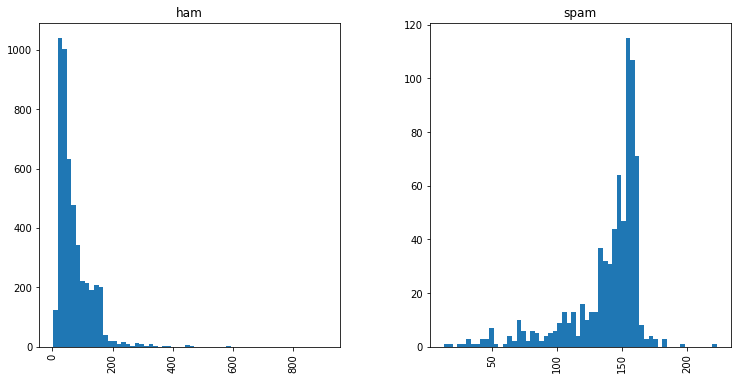

In [47]:
messages.hist(column='length', by='label', bins=60, figsize=(12,6))

In [48]:
import string

In [49]:
mess = 'Sample messages ! Notice: It has punctuation'

In [50]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [54]:
punc = [c for c in mess if c in string.punctuation]
punc

['!', ':']

In [59]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
nopunc = [c for c in mess if c not in string.punctuation]
nopunc = ''.join(nopunc)
nopunc

'Sample messages  Notice It has puncttuation'

In [61]:
nopunc.split()

['Sample', 'messages', 'Notice', 'It', 'has', 'puncttuation']

In [62]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'messages', 'Notice', 'puncttuation']

In [65]:
def text_process(mess):
  """
  1. remove punc
  2. remove stopwords
  3. return list of clean words
  """
  no_punc = [char for char in mess if char not in string.punctuation]
  no_punc = ''.join(no_punc)
  return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]


In [67]:
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [66]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [69]:
print(len(bow_transformer.vocabulary_))

11425


In [70]:
mes4 = messages['message'][3]
mes4

'U dun say so early hor... U c already then say...'

In [73]:
bow4 = bow_transformer.transform([mes4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [75]:
bow_transformer.get_feature_names_out()[4068]

'U'

In [76]:
bow_transformer.get_feature_names_out()[9554]

'say'

In [77]:
message_bow = bow_transformer.transform(messages['message'])
print(message_bow.shape)

(5572, 11425)


In [78]:
message_bow.nnz # non-zero occurances (sparse matrix)

50548

In [79]:
"""
TF: Term Frequency, which measures how frequently a term occurs in a document. 
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
IDF: Inverse Document Frequency, which measures how important a term is.
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
Example:

Consider a document containing 100 words wherein the word cat appears 3 times.

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. 
Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
"""
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [81]:
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [82]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [92]:
mess_tfidf = tfidf_transformer.transform(message_bow)

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
spam_detect_model = MultinomialNB().fit(mess_tfidf, messages['label'])

In [95]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [96]:
messages['label'][3]

'ham'

In [97]:
all_preds = spam_detect_model.predict(mess_tfidf)

In [98]:
all_preds

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [99]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [100]:
msg_train

1807    Todays Voda numbers ending 1225 are selected t...
3128    Thats cool. i liked your photos. You are very ...
5250    Urgent! Please call 09061213237 from a landlin...
4329    Congrats! 2 mobile 3G Videophones R yours. cal...
427                           aathi..where are you dear..
                              ...                        
1975    Thats cool. Where should i cum? On you or in y...
2240    Every day i use to sleep after  &lt;#&gt;  so ...
3307    HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...
4010    Ha... Then we must walk to everywhere... Canno...
5487    2p per min to call Germany 08448350055 from yo...
Name: message, Length: 3900, dtype: object

In [101]:
# data pipeline -> will allow us to set up all the transformations that we will do to the data for future use. 
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer=text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [102]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f12f55b1e60>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [103]:
preds = pipeline.predict(msg_test)
preds

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(label_test, preds))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.69      0.82       226

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672

